# Analysis of 2012 CFS Data

from:
[1] https://www.census.gov/data/datasets/2012/econ/cfs/2012-pums-files.html

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
from statistics import stdev 
import pandas as pd
import math

In [10]:
df = pd.read_csv('cfs_2012_pumf_csv.txt')

By using the "Appendix A- Data Dictionary" downloaded from https://www.census.gov/data/datasets/2012/econ/cfs/2012-pums-files.html , let's explore the product that is demanded the most in a certain city.

In [5]:
#container freight station that are origin
len(df['ORIG_CFS_AREA'].unique())

169

In [6]:
#container freight station that are destination
len(df['DEST_CFS_AREA'].unique())


132

In [11]:
destination = df['DEST_CFS_AREA'].unique()

In [91]:
product = df['SCTG'].unique()
len(product)

52

In [ ]:
data2=df[df['DEST_CFS_AREA']=="06-348"]

f= pd.DataFrame({'Destination': data2['DEST_CFS_AREA'],'Product': data2['SCTG']})
f.groupby(['Product']).count().plot(kind='bar')



### Histogram of Destinations vs Total Product Demands

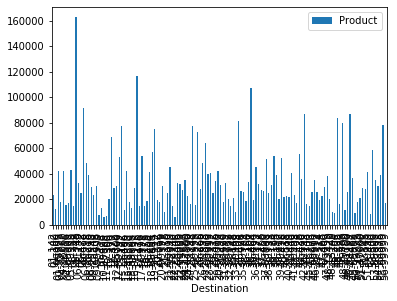

In [35]:
frame = pd.DataFrame({'Destination': df['DEST_CFS_AREA'],'Product': df['SCTG']})
frame
frame.groupby(['Destination']).count().plot(kind='bar')



### Finding which location has the biggest total product demand

In [48]:
data=frame.groupby(['Destination']).count()
data[data['Product']==data['Product'].max()]

,Product
Destination,
06-348,162548


According to the result above and the histogram, Destination 06-348 demands the most total number of products. Destination 06-348 refers to the Los Angeles-Long Beach, CA CFS Area. This location is a hot spot to explore since the flow of the products to the location is important.


### Shipment Values of Food Product  Los Angeles-Long Beach, CA CFS Area

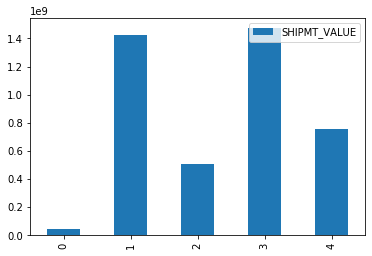

In [14]:
# data2=df[df['DEST_CFS_AREA']=="06-348"]

# frame3= pd.DataFrame({'Destination': data2['DEST_CFS_AREA'],'Product': data2['SCTG']})
data_food.groupby(['SCTG'], as_index=False)['SHIPMT_VALUE'].sum().plot(kind='bar')


# data_food = data_food.groupby(['SCTG'], as_index=False)['SHIPMT_VALUE'].sum()
# data_food

The most valuable shipment(in dollars) to CA in 2012 is in the product category of meat, poultry, fish, seafood, and their preparations.

In [15]:
data_food.groupby(['SCTG'], as_index=False)['SHIPMT_VALUE'].sum()

,SCTG,SHIPMT_VALUE
0,01,45695003
1,02,1421935055
2,04,510262446
3,05,1471361883
4,06,753753798


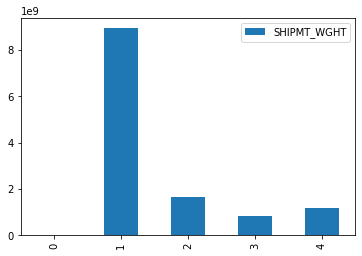

In [16]:
data_food.groupby(['SCTG'], as_index=False)['SHIPMT_WGHT'].sum().plot(kind='bar')

The most weighed shipment to CA is in the category of Cereal grains in 2012.

In [17]:
data_food.groupby(['SCTG'], as_index=False)['SHIPMT_WGHT'].sum()

,SCTG,SHIPMT_WGHT
0,01,35402850
1,02,8930131316
2,04,1668576781
3,05,839325784
4,06,1196344446


As can be seen from the histogram above, the most demanded product in Los Angeles-Long Beach, CA CFS Area is product 35 which is the Electronic and Other Electrical Equipment and Components, and Office Equipment.


### Analysis of The Most Demanded Product In a Certain State

Below we calculate the product that appeared most for a destination.
However to determine the demand we need to consider the weights
of the shipments of each product for a certain destination. After asuming 
a weight per each specific product type, we can find the demand 
amount for a product for a certain destination by dividing the total number of weight
to the unit weight that we assumed. For this stage of the project calculations we will consider,
the number of times that the product shipment appeared for a certain state in order
to find the product that has the highest demand. 

In [99]:
# list for tracking the max demand value for most demanded product
list1 = []
# list for tracking the destination of the most demanded product
list2 = []
# list for tracking the which product is the most demanded
list3 = []


"""This code determines the product i that is demanded the most 
in destination bin 2012 data in order to use it for forecast"""

#i for number each unique destination and b for product
for i in range (132):
    max_find=0
    for b in range (52):
        c = destination[i]
        d = product[b]
        dest_rows = df[df['DEST_CFS_AREA'] == c]
        dest_n_product_rows = dest_rows[dest_rows['SCTG'] == d]
        product_demand_sum = len(dest_n_product_rows.SCTG)
        if max_find<product_demand_sum:
            max_find = product_demand_sum
            e = c
            n = d
        
    list1.append(max_find)
    list2.append(e)
    list3.append(n)
max(list1)

17005

In [ ]:
df.plot(x='DEST_CFS_AREA', y='SCTG')

In [100]:
list1.index(17005)

46

In [101]:
list3[46]  #the most demanded product

'35'

In [102]:
list2[46]  #the destination of the most demanded product

'06-348'

From the "Appendix A- Data Dictionary", '35' refers to the Electronic and Other Electrical Equipment and Components, and Office Equipment as a product. Also, '06-348' refers to the destination Los Angeles-Long Beach, CA  CFS Area from the Appendix. 

After exploring the most demanded product in a certain city, let's explore the demands for critical products during Corona outbreak such as pharmaceutical products and food products in order to prevent a possible shortage of these vital products.

### Product Demands To Explore

SCTG Codes of Products: 
 
- 01 - Animals and Fish (live)
- 02 - Cereal Grains (includes seed)
- 04 - Animal Feed, Eggs, Honey, and Other Products of Animal Origin
- 05 - Meat, Poultry, Fish, Seafood, and Their Preparations
- 06 - Milled Grain Products and Preparations, and Bakery Products


- 21 - Pharmaceutical Products



Let's first explore the demand for pharmaceutical products and find where the demand is the highest.

In [87]:
len(df[df['SCTG'] == '21'])

85890

In [109]:
#in order to find the destination that the pharmaceutical products demanded the most
#and finding what this demand is

list_product = []

for i in range (132):

    c = destination[i]
    dest_rows = df[df['DEST_CFS_AREA'] == c]
    dest_n_product_rows = dest_rows[dest_rows['SCTG'] == '21']
    product_demand_sum = len(dest_n_product_rows.SCTG)

    list_product.append(product_demand_sum)

max_prod_demand = max(list_product)
dest_index_max_demand=list_product.index(max_prod_demand)
dest_index_max_demand

46

In [111]:
#the demand of the location that demands pharmaceuticals the most
max_prod_demand

2981

In [110]:
#most demanded destination for pharmaceuticals
destination[dest_index_max_demand]

'06-348'

We can observe the similar type of findings for the rest of the vital products in the further steps of the project.
Now let's try to incorporate the demand forecasting in in order to plot the forecast for different leadtimes in supply chain. Such plots will be obtained by including the demand amounts for a certain product from the data set and its forecast will be comnducted by the code below. For now this code implements the forecast and generate plots according to random initial order values for retailer.

In [11]:
data_food=df[(df['SCTG']== "01")|(df['SCTG']== "02") | (df['SCTG']== "04") | (df['SCTG']== "05") | (df['SCTG']== "06")]


In [12]:
data_food = data_food.groupby(['DEST_STATE', 'SCTG'], as_index=False)['SHIPMT_VALUE','SHIPMT_WGHT'].sum()
data_food

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
0,1,01,368470,233494
1,1,02,12119973,107370790
2,1,04,5672175,18865701
3,1,05,22734763,14879686
4,1,06,9885963,11016891
...,...,...,...,...
241,55,06,16714594,24434752
242,56,02,77117,278792
243,56,04,179272,2802110
244,56,05,721270,316388


In [5]:
data_food=data_food[pd.to_numeric(data_food['SHIPMT_VALUE'], errors='coerce').notnull()]
data_food=data_food[pd.to_numeric(data_food['SHIPMT_WGHT'], errors='coerce').notnull()]
data_food

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
0,1,01,368470,233494
1,1,02,12119973,107370790
2,1,04,5672175,18865701
3,1,05,22734763,14879686
4,1,06,9885963,11016891
...,...,...,...,...
241,55,06,16714594,24434752
242,56,02,77117,278792
243,56,04,179272,2802110
244,56,05,721270,316388


In [6]:
meat=data_food[data_food["SCTG"]=="05"]

## Plotting the Demand for Meat Products (in dollars) for each state

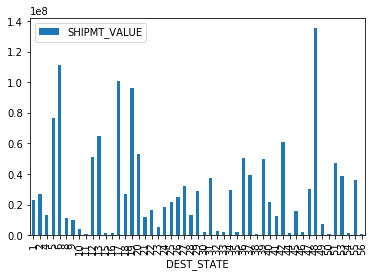

In [8]:
meat.plot(x='DEST_STATE', y='SHIPMT_VALUE', kind='bar')

Meat, fish, seafood and their preperations are demanded the most in Texas in 2012. The second highest demand is in CA.


In [11]:
maxval_05 = data_food[data_food["SCTG"]=="05"]
maxval_05.sort_values('SHIPMT_VALUE', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
211,48,05,135486280,92690527
21,6,05,111110992,60804571
64,17,05,100616357,55600476


In [13]:
maxval_05.sort_values('SHIPMT_WGHT', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
211,48,05,135486280,92690527
21,6,05,111110992,60804571
64,17,05,100616357,55600476


In [14]:
maxval_02 = data_food[data_food["SCTG"]=="02"]
maxval_02.sort_values('SHIPMT_VALUE', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
87,22,02,650173801,3487159094
209,48,02,178766358,1275677729
72,19,02,78325413,379200770


In [15]:
maxval_02.sort_values('SHIPMT_WGHT', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
87,22,02,650173801,3487159094
209,48,02,178766358,1275677729
62,17,02,55770190,394754879


In [16]:
maxval_04 = data_food[data_food["SCTG"]=="04"]
maxval_04.sort_values('SHIPMT_VALUE', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
20,6,04,45635697,136722088
210,48,04,35876589,117037547
73,19,04,31763137,159110821


In [17]:
maxval_04.sort_values('SHIPMT_WGHT', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
73,19,04,31763137,159110821
20,6,04,45635697,136722088
113,27,04,29658447,128155716


In [18]:
maxval_06 = data_food[data_food["SCTG"]=="06"]
maxval_06.sort_values('SHIPMT_VALUE', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
22,6,06,79592259,108099257
65,17,06,61127916,74491665
189,42,06,57244989,71328769


In [19]:
maxval_06.sort_values('SHIPMT_WGHT', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
90,22,06,36623152,163253129
22,6,06,79592259,108099257
212,48,06,43873868,74798384


In [20]:
maxval_01 = data_food[data_food["SCTG"]=="01"]
maxval_01.sort_values('SHIPMT_VALUE', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
76,20,01,15364894,11707447
208,48,01,7496110,5627534
23,8,01,5662924,4550297


In [21]:
maxval_01.sort_values('SHIPMT_WGHT', ascending=False).head(3)

,DEST_STATE,SCTG,SHIPMT_VALUE,SHIPMT_WGHT
76,20,01,15364894,11707447
208,48,01,7496110,5627534
23,8,01,5662924,4550297


   Cereal grains has the most demand among food products and the most demands for this product is in 22th State which is Louisiana.